# STARE-based Integrative Analysis of Diverse Data Using Dask Parallel Programming Demo Paper

## Preliminaries

In [1]:
import pystare as ps

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf

import numpy
import shapely

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

import geopandas

import os
import sys
from io import BytesIO

%matplotlib inline
# %matplotlib notebook

In [37]:
def divert_stderr():
    sys.stderr = open('stderr.out','w')  
    return

def restore_stderr():
    sys.stderr.close()
    with open('stderr.out') as f:
        count = sum(1 for _ in f)
    if count > 0:
        print(count, 'warnings or errors encountered while stderr diverted. See stderr.out.')
    sys.stderr = sys.__stderr__
    return

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import cartopy.crs as ccrs
import cartopy.feature as cf

import numpy
import shapely

# Some helper functions for plotting & printing.

def mnmx(a):
    return numpy.amin(a),numpy.amax(a)
def span(a):
    return numpy.amax(a)-numpy.amin(a)

class figax_container(object):
    def __init__(self,figax,plot_options=None):
        self.fig = figax[0]
        self.ax  = figax[1]
        self.plot_options = plot_options
        return

def add_coastlines(figax,set_global=False):
    "Add coastlines to the plot."
    ax = figax.ax
    if set_global:
        ax.set_global()
    ax.coastlines()
    return figax

def hello_plot(
        spatial_index_values=None
        ,figax=None
        ,plot_options=None
        ,set_global=False
        ,set_coastlines=True
        ,show=True
        ,color=None
        ,lw=1
        ,dbg=0
        ,fixdateline=False
        ):

    if spatial_index_values is not None:
        # Calculate vertices and interconnection matrix
        lons,lats,intmat = ps.triangulate_indices(spatial_index_values)
        
        if dbg>0:
            print('lons: ',mnmx(lons))
            print('lats: ',mnmx(lats))
            # print('lons: ',lons)
            # print('lats: ',lats)
        
        # Make triangulation object & plot
        siv_triang = tri.Triangulation(lons,lats,intmat)
        # print('plot type triang: ',type(siv_triang))

    if figax is not None:
        plot_options = figax.plot_options
    
    if plot_options is None:
        if spatial_index_values is not None:
            mnx  = mnmx(lons)
            if fixdateline:
                s = span(lons)
                if s > 270:
                    clon = ((0.5 * (sum(mnx)+180))%360)-180
                else:
                    clon = 0.5*sum(mnx)
            else:
                clon = 0.5*sum(mnx)
            plot_options = {
                'projection':ccrs.PlateCarree(
                    central_longitude=clon
                    # ,central_latitude=0.5*(numpy.amin(lats)+numpy.amax(lats))
                                             )
            ,'transform':ccrs.Geodetic()}
            if dbg>0:
                print('hp-po central_longitude: ',clon)
        else:
            plot_options = {'projection':ccrs.PlateCarree()
                           ,'transform':ccrs.Geodetic()}

        
    if figax is None:
        figax = figax_container(plt.subplots(1,subplot_kw=plot_options),plot_options=plot_options)
        if set_global:
            figax.ax.set_global()
        if set_coastlines:
            figax.ax.coastlines()
    else:
        ax = figax.ax  
        
    if spatial_index_values is not None: 
        divert_stderr()
        figax.ax.triplot(siv_triang,c=color,transform=plot_options['transform'],lw=lw)
        restore_stderr()
    
    if show:
        plt.show()
        
    if dbg>0:
        return figax,lons,lat,intmat
    return figax

def hex16(i):
    return "0x%016x"%i

def lonlat_from_coords(coords):
    tmp = numpy.array(coords)
    lat=tmp[:,1]
    lon=tmp[:,0]
    return lon,lat

km  = 1 # Unit of length
deg = 1 # Unit of angle

# Set up the projection and transformation
proj         = ccrs.PlateCarree()
# proj        = ccrs.Robinson() # Drives matplotlib bug.
# proj        = ccrs.Mollweide() # Drives matplotlib bug.
transf       = ccrs.Geodetic()
plot_options = {'projection':proj,'transform':transf}

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5*default_dpi

## STARE HTM Geolocation

## STARE HTM Trixel Neighborhoods

## STARE Cover of a Granule

## STARE Region of Interest

## STARE Sidecar Files and Cataloguing

In [ ]:
import boto3
from botocore import UNSIGNED
from botocore.config import Config

In [3]:
import pandas
import geopandas
import starepandas

In [4]:
starepandas.__version__

'0+untagged.21.g239609c.dirty'

In [5]:
folder = '/home/jovyan/data/'
catalogue = starepandas.folder2catalogue(path=folder, 
                             granule_extension='hdf',
                             add_sf=True)


no sidecar found for /home/jovyan/data/MOD05_L2.A2019336.2310.061.2019337071934.hdf


In [6]:
catalogue.head()

,begining,ending,geom,granule_name,sidecar_name,stare_cover
0,2019-12-02 23:40:00,2019-12-02 23:45:00,"POLYGON ((151.85922 -0.93512, 151.84624 -1.024...",/home/jovyan/data/MOD05_L2.A2019336.2340.061.2...,/home/jovyan/data/MOD05_L2.A2019336.2340.061.2...,"[756604737398243331, 785878134976151556, 10133..."
1,2019-12-02 23:55:00,2019-12-03 00:00:00,"POLYGON ((129.30196 -52.27200, 129.22920 -52.3...",/home/jovyan/data/MOD05_L2.A2019336.2355.061.2...,/home/jovyan/data/MOD05_L2.A2019336.2355.061.2...,"[1990591035297759235, 1884756444054552580, 189..."
2,2019-12-02 23:30:00,2019-12-02 23:35:00,"POLYGON ((157.96890 34.89169, 157.96465 34.801...",/home/jovyan/data/MOD05_L2.A2019336.2330.061.2...,/home/jovyan/data/MOD05_L2.A2019336.2330.061.2...,"[875950127523561476, 887209126591987716, 89171..."
3,2019-12-02 23:20:00,2019-12-02 23:25:00,"POLYGON ((158.99763 70.64761, 159.02464 70.557...",/home/jovyan/data/MOD05_L2.A2019336.2320.061.2...,/home/jovyan/data/MOD05_L2.A2019336.2320.061.2...,"[3566850904877432835, 3503800510094245892, 350..."
4,2019-12-02 23:50:00,2019-12-02 23:55:00,"POLYGON ((140.56430 -35.90131, 140.52820 -35.9...",/home/jovyan/data/MOD05_L2.A2019336.2350.061.2...,/home/jovyan/data/MOD05_L2.A2019336.2350.061.2...,"[1299288492496388100, 1303792092123758596, 130..."


In [22]:
!ls /home/jovyan/data/*stare*| wc -l

11


In [25]:
len([i.size for i in catalogue['stare_cover']])

11

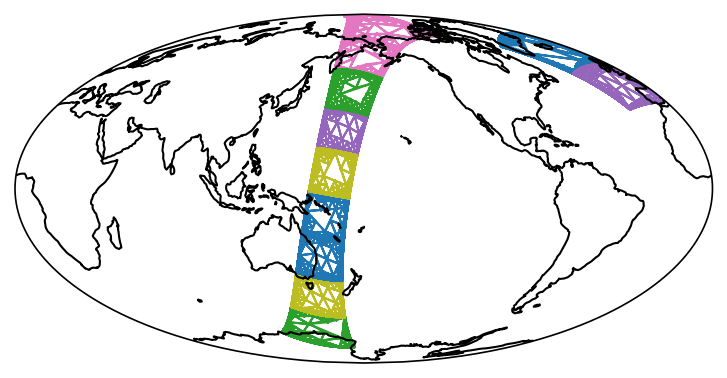

In [41]:
figax=hello_plot(set_global=True,show=False
                 ,plot_options={'projection':ccrs.Mollweide(central_longitude=180),'transform':ccrs.Geodetic()}
                )
for i in catalogue['stare_cover']:
    hello_plot(i.data,figax=figax,show=False)
plt.show()

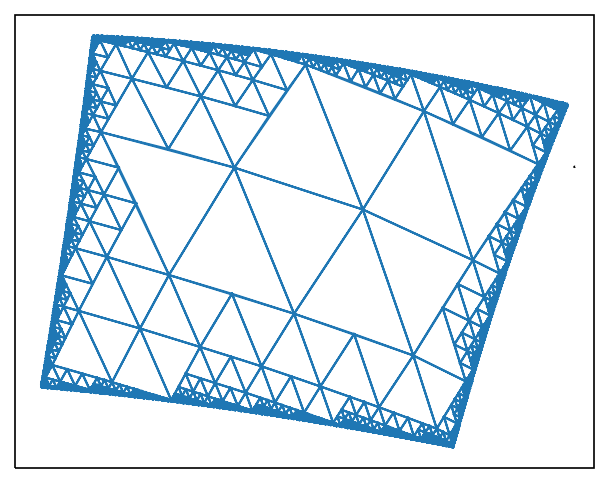

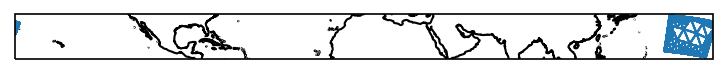

In [38]:
hello_plot(catalogue['stare_cover'][2].data,fixdateline=True)
hello_plot(catalogue['stare_cover'][2].data,fixdateline=False)
plt.show()

In [7]:
catalogue['stare_cover'][1].size

7116

## Searching the Catalogue

## Subsetting the Data

## Dask Acceleration

### Dask Preliminaries

### Example Parallelization

### Trixel-based Integration

## Conclusion